In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
from pandas.plotting import autocorrelation_plot
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
import joblib

In [ ]:
data = "/content/delhi_aqi.csv"
df = pd.read_csv(data)
df.head()

,date,co,no,no2,o3,so2,pm2_5,pm10,nh3
0,11/25/2020 1:00,2616.88,2.18,70.60,13.59,38.62,364.61,411.73,28.63
1,11/25/2020 2:00,3631.59,23.25,89.11,0.33,54.36,420.96,486.21,41.04
2,11/25/2020 3:00,4539.49,52.75,100.08,1.11,68.67,463.68,541.95,49.14
3,11/25/2020 4:00,4539.49,50.96,111.04,6.44,78.20,454.81,534.00,48.13
4,11/25/2020 5:00,4379.27,42.92,117.90,17.17,87.74,448.14,529.19,46.61


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18776 entries, 0 to 18775
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    18776 non-null  object 
 1   co      18776 non-null  float64
 2   no      18776 non-null  float64
 3   no2     18776 non-null  float64
 4   o3      18776 non-null  float64
 5   so2     18776 non-null  float64
 6   pm2_5   18776 non-null  float64
 7   pm10    18776 non-null  float64
 8   nh3     18776 non-null  float64
dtypes: float64(8), object(1)
memory usage: 1.3+ MB


In [ ]:
summary_statistics = df.describe()
summary_statistics

,co,no,no2,o3,so2,pm2_5,pm10,nh3
count,18776.000000,18776.000000,18776.000000,18776.000000,18776.000000,18776.000000,18776.000000,18776.000000
mean,2929.228628,33.660702,66.221299,60.346239,66.693633,238.130309,300.092966,25.109815
std,2854.523506,62.127118,48.527492,80.464932,49.439191,226.533625,267.165827,26.402108
min,260.350000,0.000000,4.280000,0.000000,5.250000,11.830000,15.070000,0.000000
25%,1068.120000,0.680000,33.930000,0.340000,34.810000,84.440000,118.797500,9.630000
50%,1842.500000,5.250000,54.150000,27.180000,52.930000,157.445000,209.705000,17.480000
75%,3685.000000,35.760000,83.630000,92.980000,82.020000,313.000000,387.965000,30.400000
max,21148.680000,500.680000,460.620000,801.090000,579.830000,1708.090000,1969.930000,287.770000


In [ ]:
#Step 1: Convert the 'date' column to datetime format
df['date'] = pd.to_datetime(df['date'], format='%m/%d/%Y %H:%M')

#Step 2: Create new columns for day, month and year
df['day'] = df['date'].dt.date
df['month'] = df['date'].dt.month
df['year'] = df['date'].dt.year

#Step 3: Calculate daily average for each pollutant

daily_avg = df.groupby('day').mean(numeric_only=True).reset_index()

#Step 4: Plot trends for key pollutants over time
def plot_trend(data, pollutant, title):
    plt.figure(figsize=(7,4))
    plt.plot(data['day'], data[pollutant], marker='o', linestyle='-', markersize=2)
    plt.title(title)
    plt.xlabel('Date')
    plt.ylabel(f'{pollutant} Concentration')
    plt.grid(True)
    plt.show()

pollutants = ['co', 'no', 'no2', 'o3', 'so2', 'pm2_5', 'pm10', 'nh3']

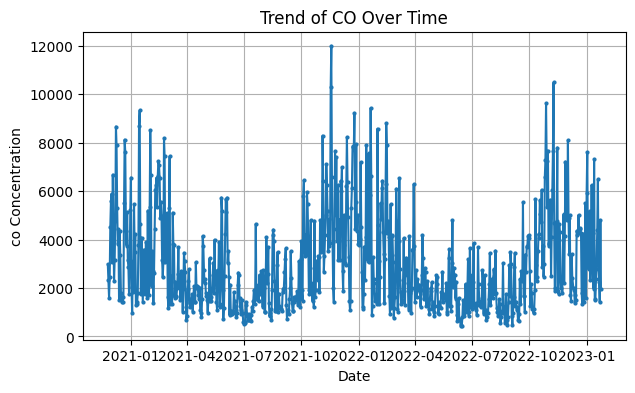

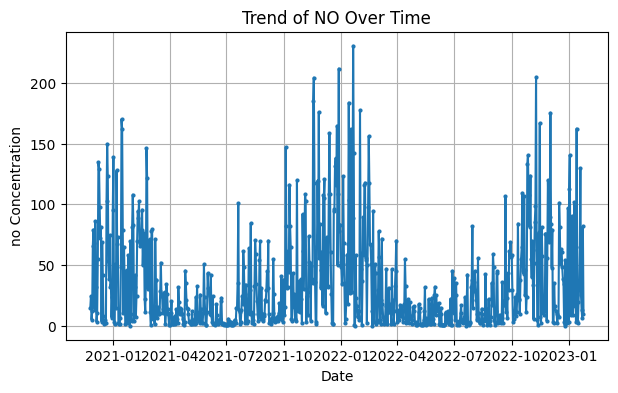

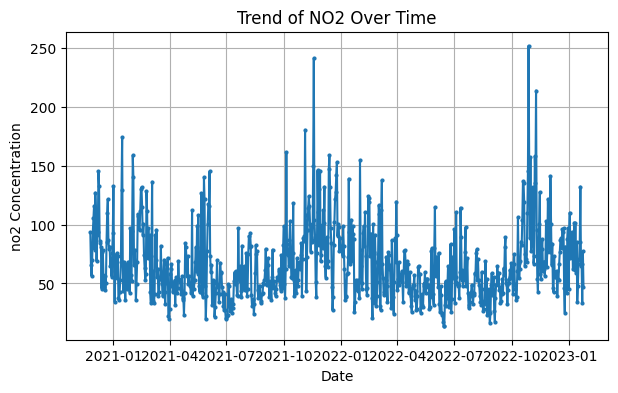

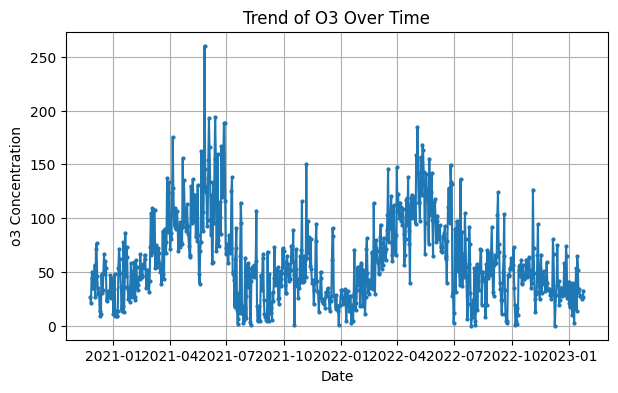

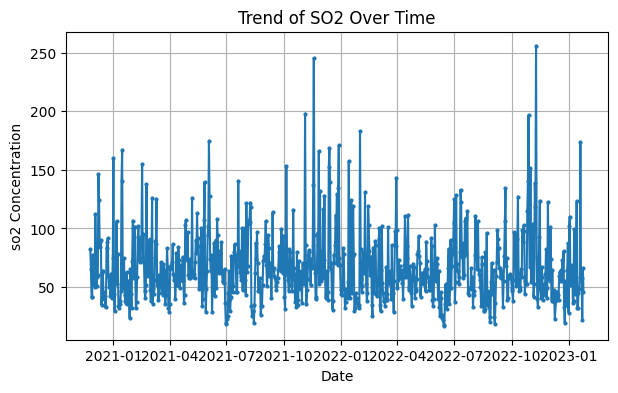

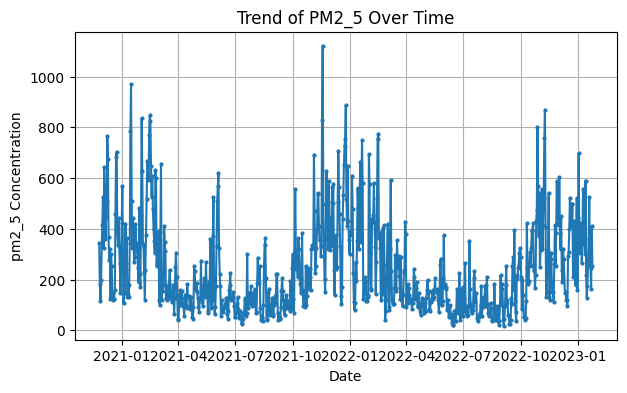

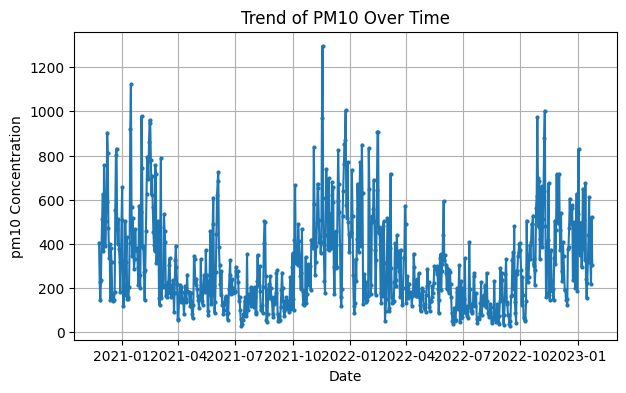

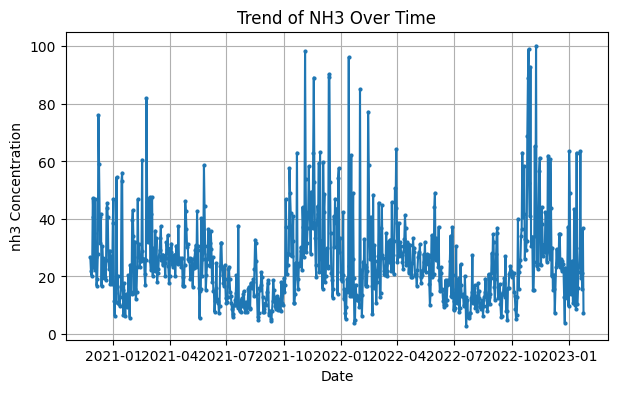

In [ ]:
for pollutant in pollutants:
    plot_trend(daily_avg, pollutant, f'Trend of {pollutant.upper()} Over Time')

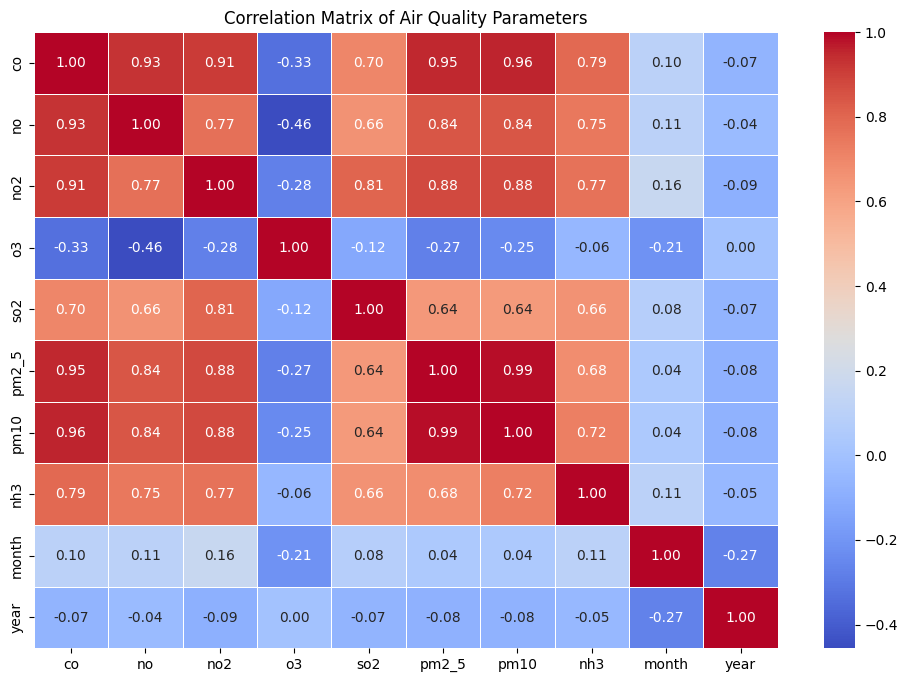

In [ ]:
#Step 1: Convert the 'date' column to datetime format
df['date'] = pd.to_datetime(df['date'], format='%m/%d/%Y %H:%M')

#Step 2: Create new columns for day, month and year
df['day'] = df['date'].dt.date
df['month'] = df['date'].dt.month
df['year'] = df['date'].dt.year

#Step 3: Calculate daily average for each pollutant

daily_avg = df.groupby('day').mean(numeric_only=True).reset_index()

# Remove the 'day' column from the dataframe to calculate the correlation matrix
daily_avg_no_day = daily_avg.drop(columns=['day'])

# Step 1: Calculate the correlation matrix
correlation_matrix = daily_avg_no_day.corr()

# Step 2: Plot a heatmap to visualize the correlations
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of Air Quality Parameters')
plt.show()


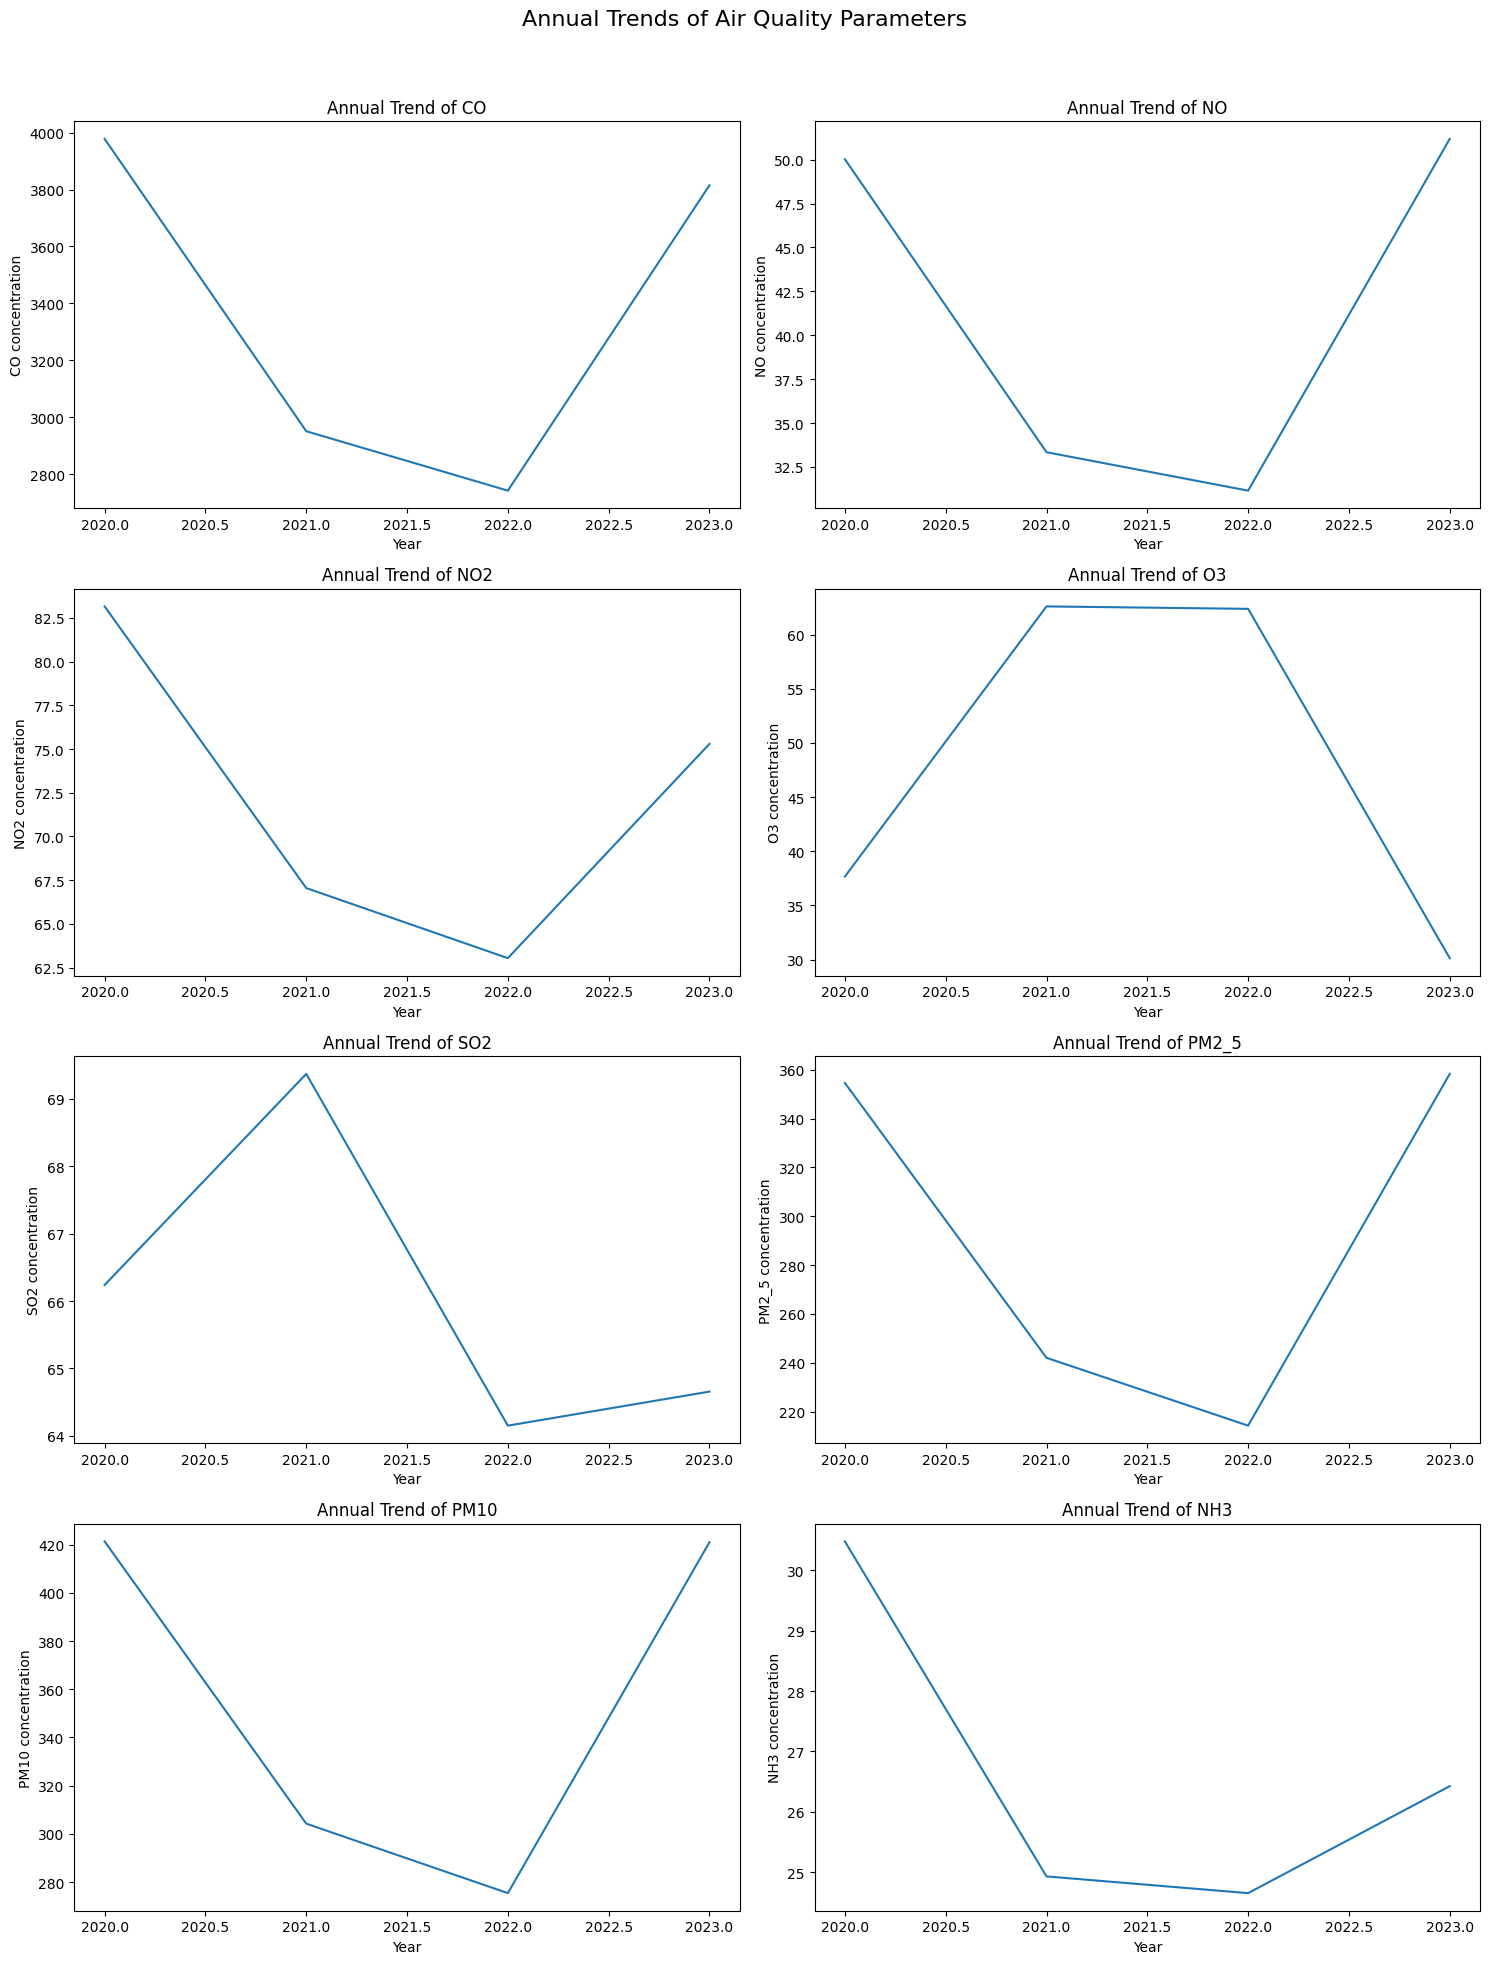

In [ ]:
# Vẽ biểu đồ
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(15, 20))
fig.suptitle('Annual Trends of Air Quality Parameters', fontsize=16)

pollutants = ['co', 'no', 'no2', 'o3', 'so2', 'pm2_5', 'pm10', 'nh3', 'year']

# Tính trung bình hàng các năm
yearly_avg = df[pollutants].groupby('year').mean()

for ax, pollutant in zip(axes.flatten(), pollutants):
    ax.plot(yearly_avg.index, yearly_avg[pollutant])
    ax.set_title(f'Annual Trend of {pollutant.upper()}')
    ax.set_xlabel('Year')
    ax.set_ylabel(f'{pollutant.upper()} concentration')

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

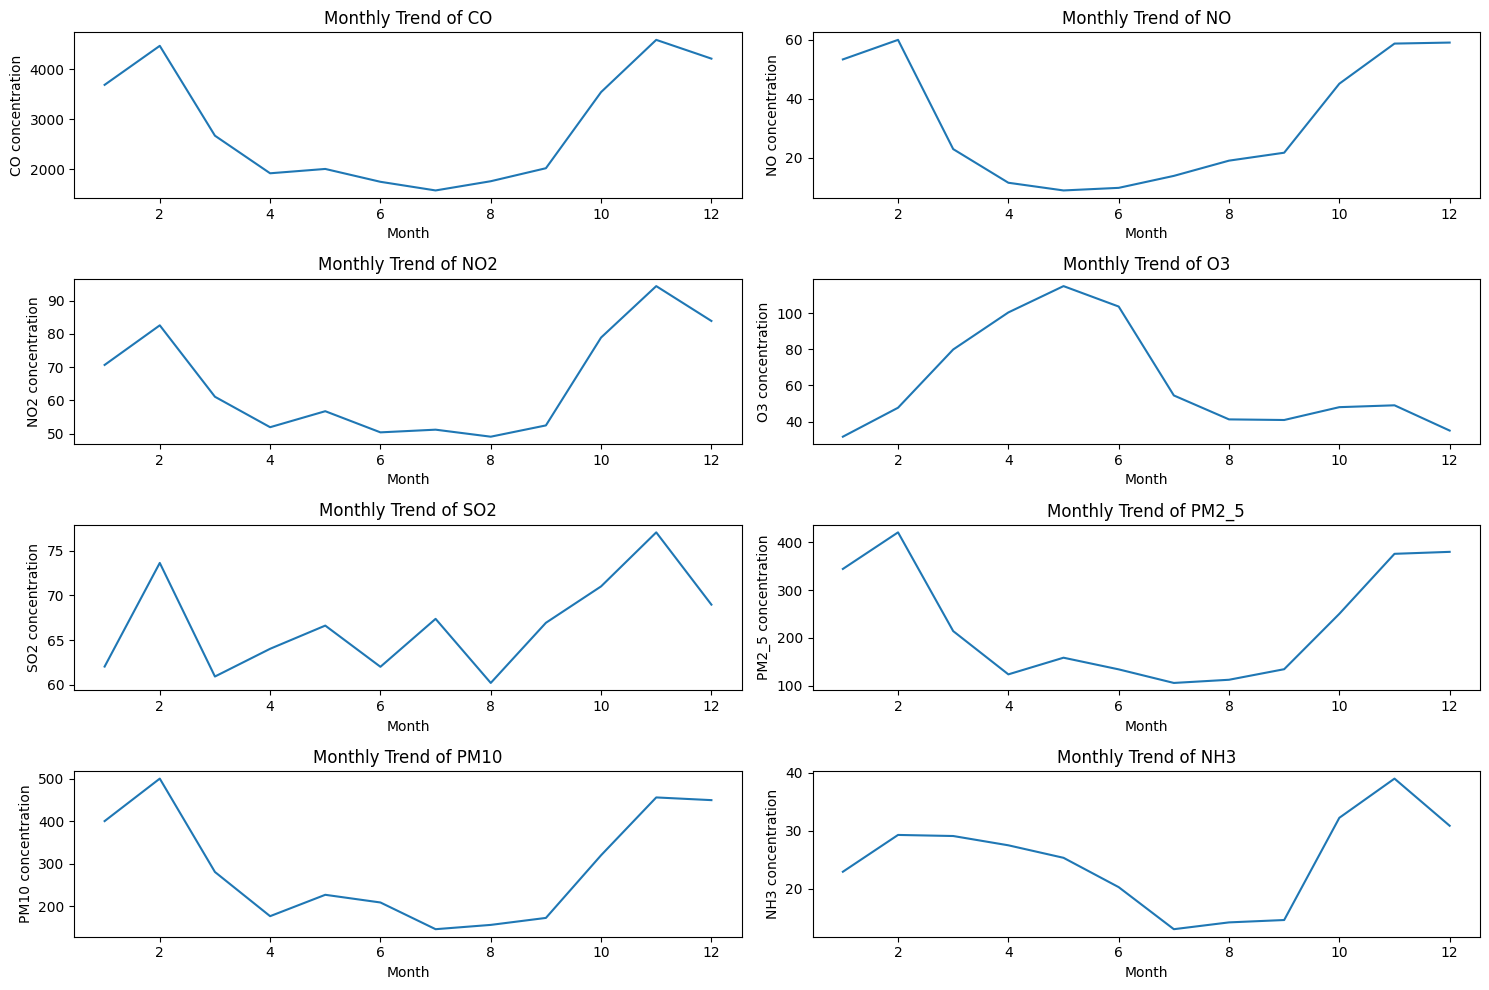

In [ ]:
# Chỉ chọn các cột số học cần thiết
numeric_columns = ['co', 'no', 'no2', 'o3', 'so2', 'pm2_5', 'pm10', 'nh3', 'month', 'year']

# Tính trung bình hàng tháng
monthly_avg = df[numeric_columns].groupby('month').mean().reset_index()

# Vẽ biểu đồ xu hướng hàng tháng
plt.figure(figsize=(15, 10))

pollutants = ['co', 'no', 'no2', 'o3', 'so2', 'pm2_5', 'pm10', 'nh3']

for i, pollutant in enumerate(pollutants, 1):
    plt.subplot(4, 2, i)
    sns.lineplot(data=monthly_avg, x='month', y=pollutant)
    plt.title(f'Monthly Trend of {pollutant.upper()}')
    plt.xlabel('Month')
    plt.ylabel(f'{pollutant.upper()} concentration')

plt.tight_layout()
plt.show()

In [ ]:
def pm25_to_aqi(pm25):
    if pm25 <= 12:
        return pm25 * 50 / 12
    elif pm25 <= 35.4:
        return 50 + (pm25 - 12) * (100 - 51) / (35.4 - 12)
    elif pm25 <= 55.4:
        return 100 + (pm25 - 35.4) * (150 - 101) / (55.4 - 35.4)
    elif pm25 <= 150.4:
        return 150 + (pm25 - 55.4) * (200 - 151) / (150.4 - 55.4)
    elif pm25 <= 250.4:
        return 200 + (pm25 - 150.4) * (300 - 201) / (250.4 - 150.4)
    elif pm25 <= 350.4:
        return 300 + (pm25 - 250.4) * (400 - 301) / (350.4 - 250.4)
    elif pm25 <= 500.4:
        return 400 + (pm25 - 350.4) * (500 - 401) / (500.4 - 350.4)
    else:
        return 500

In [ ]:
# Tính toán AQI cho PM2.5 từ cột pm2.5 của dữ liệu
df['aqi_pm25'] = df['pm2_5'].apply(pm25_to_aqi)

# Chuyển đổi AQI thành các nhãn (labels)
def aqi_label(aqi):
    if aqi <= 50:
        return 0  # Good
    elif aqi <= 100:
        return 1  # Moderate
    elif aqi <= 200:
        return 2  # Unhealthy for Sensitive Groups
    elif aqi <= 300:
        return 3  # Unhealthy
    elif aqi <= 400:
        return 4  # Very Unhealthy
    else:
        return 5  # Hazardous


In [ ]:
df['aqi_category'] = df['aqi_pm25'].apply(aqi_label)

# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
X = df[['pm2_5']]  # Input features
y_reg = df['aqi_pm25']  # Labels for regression
y_clf = df['aqi_category']  # Labels for classification

X_train, X_test, y_reg_train, y_reg_test = train_test_split(X, y_reg, test_size=0.2, random_state=42)
_, _, y_clf_train, y_clf_test = train_test_split(X, y_clf, test_size=0.2, random_state=42)

# Huấn luyện mô hình Linear Regression
linear_model = LinearRegression()
linear_model.fit(X_train, y_reg_train)

# Dự đoán với mô hình Linear Regression
y_reg_pred = linear_model.predict(X_test)

# Đánh giá mô hình Linear Regression
mae = mean_absolute_error(y_reg_test, y_reg_pred)
mse = mean_squared_error(y_reg_test, y_reg_pred)
r2 = r2_score(y_reg_test, y_reg_pred)

print("Linear Regression Evaluation:")
print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"R²: {r2}")

# Huấn luyện mô hình Logistic Regression
logistic_model = LogisticRegression(max_iter=200)
logistic_model.fit(X_train, y_clf_train)

# Dự đoán với mô hình Logistic Regression
y_clf_pred = logistic_model.predict(X_test)

# Đánh giá mô hình Logistic Regression
print("Logistic Regression Evaluation:")
print(confusion_matrix(y_clf_test, y_clf_pred))
print(classification_report(y_clf_test, y_clf_pred))

Linear Regression Evaluation:
MAE: 39.459866439280106
MSE: 3082.618303807115
R²: 0.8194346710216699
Logistic Regression Evaluation:
[[ 182    0    0    0    0]
 [   3 1627    2    0    0]
 [   0    0  706    0    0]
 [   0    0    2  439    0]
 [   0    0    0    0  795]]
              precision    recall  f1-score   support

           1       0.98      1.00      0.99       182
           2       1.00      1.00      1.00      1632
           3       0.99      1.00      1.00       706
           4       1.00      1.00      1.00       441
           5       1.00      1.00      1.00       795

    accuracy                           1.00      3756
   macro avg       1.00      1.00      1.00      3756
weighted avg       1.00      1.00      1.00      3756



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
def evaluate_arima_model(X, arima_order):
    train_size = int(len(X) * 0.70)
    train, test = X[0:train_size], X[train_size:]
    history = [x for x in train]
    predictions = list()
    for t in range(len(test)):
        model = ARIMA(history, order=arima_order)
        model_fit = model.fit()
        yhat = model_fit.forecast()[0]
        predictions.append(yhat)
        history.append(test[t])
    mse = mean_squared_error(test, predictions)
    mae = mean_absolute_error(test, predictions)
    r2 = r2_score(test, predictions)

    # Round and calculate accuracy
    rounded_test = np.round(test)
    rounded_predictions = np.round(predictions)

    # Calculate accuracy
    acc = accuracy_score(rounded_test, rounded_predictions)

    result = {
        'model_fit': model_fit,
        'mse': mse,
        'mae': mae,
        'r2': r2,
        'predictions': predictions,
        'test': test,
        'train': train,
        'acc': acc
    }
    return result

In [ ]:
def evaluate_models(dataset, p_values, d_values, q_values):
    dataset = dataset.astype('float32')
    best_score, best_cfg = float("inf"), None
    for p in p_values:
        for d in d_values:
            for q in q_values:
                order = (p,d,q)
                try:
                    mse = evaluate_arima_model(dataset, order)['mse']
                    if mse < best_score:
                        best_score, best_cfg = mse, order
                    print(f'ARIMA{order} MSE= {mse:.3f}')
                except Exception as e:
                    print(f'ARIMA{order} Exception: {e}')
                    continue
    print(f'Best ARIMA {best_cfg} MSE= {best_score:.3f}')

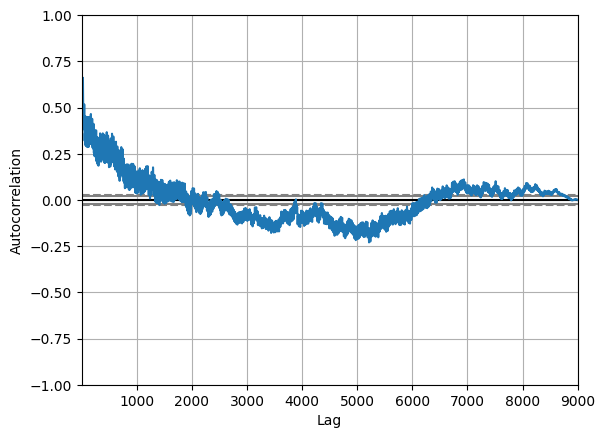

In [ ]:
# Assuming df['pm2_5'] contains PM2.5 data
df_aqi = df['pm2_5'].apply(pm25_to_aqi)

# Use a smaller subset for quick testing
df_aqi_subset = df_aqi.head(9000)

# Plot autocorrelation
autocorrelation_plot(df_aqi_subset)
plt.show()

In [ ]:
arima_order = (1, 0, 0)
arima_model_1 = evaluate_arima_model(df_aqi_subset.values, arima_order)
model_fit = arima_model_1['model_fit']



In [34]:
# Print results
print("Mean Squared Error:", arima_model_1['mse'])
print("Mean Absolute Error:", arima_model_1['mae'])
print("R_squared:", arima_model_1['r2'])
print("Accuracy:", arima_model_1['acc'])

Mean Squared Error: 1417.5682536603713
Mean Absolute Error: 22.183512675744694
R_squared: 0.9169321585230273
Accuracy: 0.024074074074074074


In [29]:
# Lưu mô hình ARIMA đã huấn luyện
joblib.dump(model_fit, 'arima_model.pkl')

['arima_model.pkl']

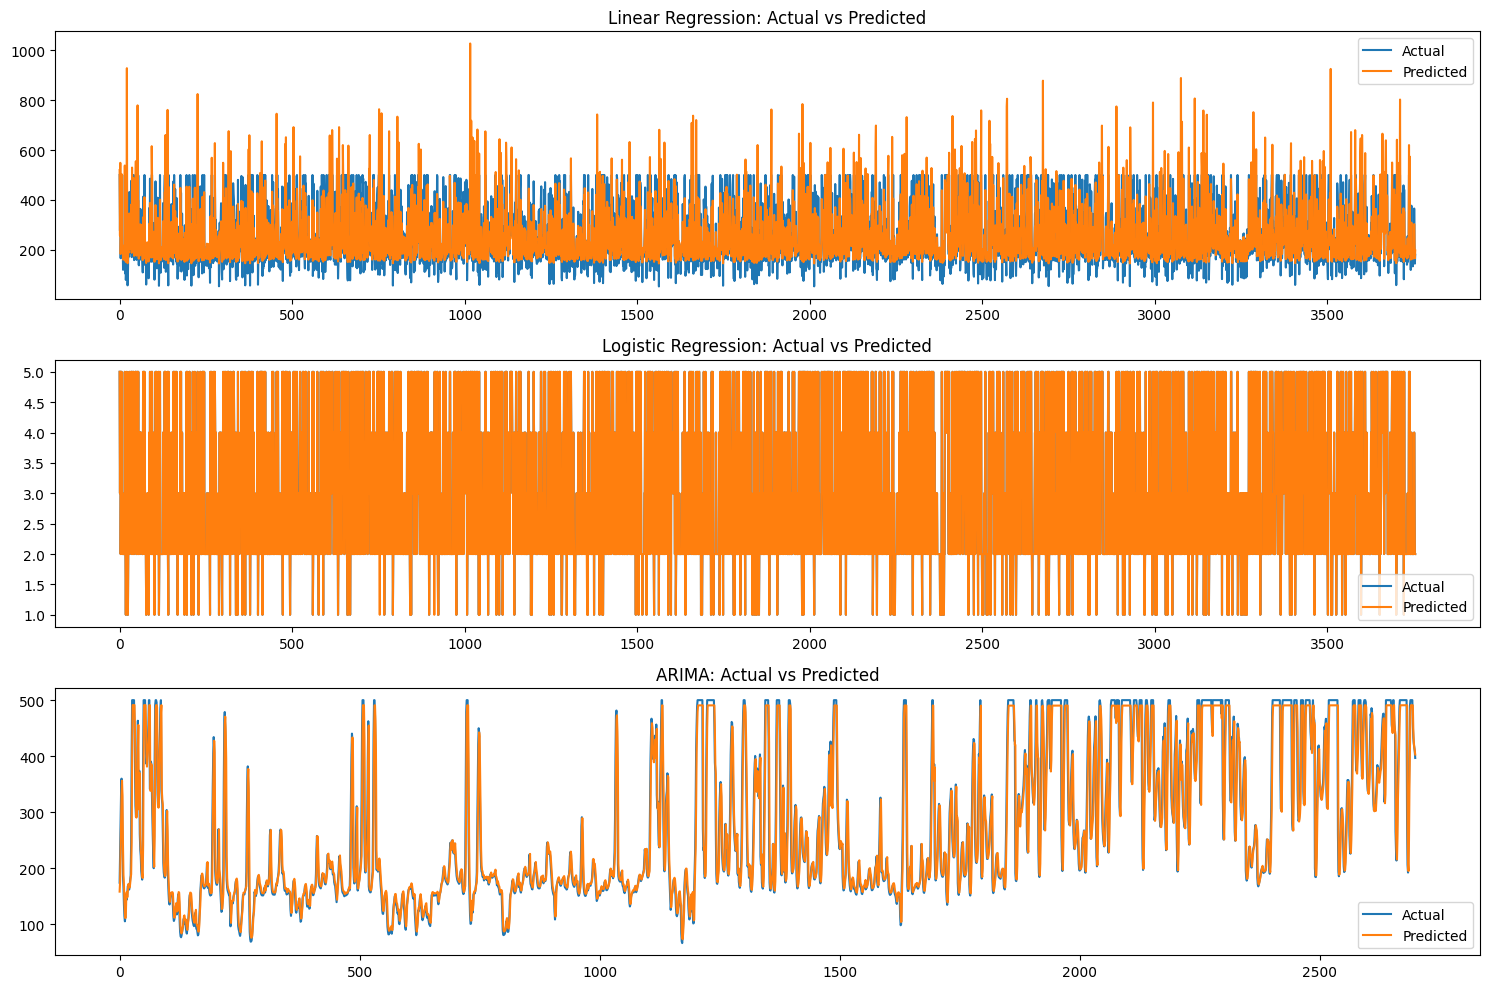

In [35]:
# Plotting the results
plt.figure(figsize=(15, 10))

# Linear Regression Plot
plt.subplot(3, 1, 1)
plt.plot(y_reg_test.values, label='Actual')
plt.plot(y_reg_pred, label='Predicted')
plt.title('Linear Regression: Actual vs Predicted')
plt.legend()

# Logistic Regression Plot
plt.subplot(3, 1, 2)
plt.plot(y_clf_test.values, label='Actual')
plt.plot(y_clf_pred, label='Predicted')
plt.title('Logistic Regression: Actual vs Predicted')
plt.legend()

# ARIMA Plot
plt.subplot(3, 1, 3)
plt.plot(arima_model_1['test'], label='Actual')
plt.plot(arima_model_1['predictions'], label='Predicted')
plt.title('ARIMA: Actual vs Predicted')
plt.legend()

plt.tight_layout()
plt.show()